# Regression lineaire et multilineaire

### Author:  Ricardo Vallejo

## 1. Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


tit = pd.read_excel("C:\wrkOrion3\IACollege\DataProcess\Correlation\cars.xlsx")
pd.options.display.max_columns = None
tit.head(10)

,Id,type,prix,cylindree,puissance,poids,conso
0,1,Daihatsu Cuore,11600,846,32,650,5.7
1,2,Suzuki Swift 1.0 GLS,12490,993,39,790,5.8
2,3,Fiat Panda Mambo L,10450,899,29,730,6.1
3,4,VW Polo 1.4 60,17140,1390,44,955,6.5
4,5,Opel Corsa 1.2i Eco,14825,1195,33,895,6.8
5,6,Toyota Corolla,19490,1331,55,1010,7.1
6,7,Mercedes S 600,183900,5987,300,2250,18.7
7,8,Maserati Ghibli GT,92500,2789,209,1485,14.5
8,9,Opel Astra 1.6i 16V,25000,1597,74,1080,7.4
9,10,Peugeot 306 XS 108,22350,1761,74,1100,9.0


# 2. Regression Lineal

## 2.1.  Methode 1 - sklearn

In [15]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

x1 = np.array(tit["cylindree"]).reshape((-1,1))
y1 = tit['puissance']

mymodel = LinearRegression()
results = mymodel.fit(x1,y1)

print("Coeficient determination: \n", results.score(x1, y1))
print("Intercept: \n", results.intercept_)
print("Slope: \n", results.coef_)

Coeficient determination: 
 0.9264320565625962
Intercept: 
 -24.163623713709967
Slope: 
 [0.05791742]


In [4]:
 # y = mx + b ==> y = Slope * X + Intercept ==> y = 0.0579x-24.163

## 2.2. Model Graphique verification

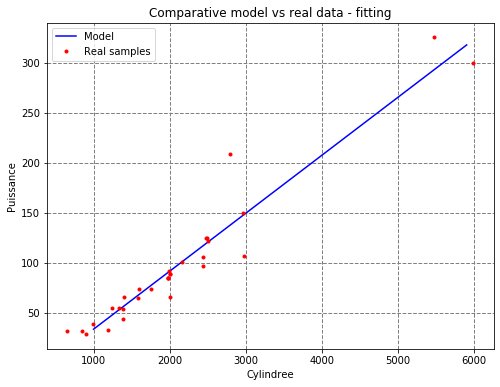

In [16]:
def Yy(m, b, x):
    return m*x + b;

Xmodel = range(1000,6000, 100)
Ymodel = Yy(results.coef_, results.intercept_,  Xmodel)

plt.figure(figsize=(8, 6))
plt.plot(Xmodel, Yy(results.coef_, results.intercept_,  Xmodel), 'b-', label='Model')
plt.plot(tit['cylindree'], tit['puissance'], 'r.', label='Real samples')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Puissance")
plt.xlabel("Cylindree")
plt.title('Comparative model vs real data - fitting')
plt.legend(loc='best')
plt.show()


## 2.3. Methode 2 - statsmodels

In [6]:
from statsmodels.formula.api import ols

model1 = ols('puissance ~ cylindree', data=tit).fit()

print("Results summary: \n", model1.summary())

Results summary: 
                             OLS Regression Results                            
Dep. Variable:              puissance   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     365.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           5.62e-18
Time:                        20:04:49   Log-Likelihood:                -134.44
No. Observations:                  31   AIC:                             272.9
Df Residuals:                      29   BIC:                             275.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.1636      7.216 

### The result are the same y = 0.0579x - 24.163

# 3.  Analysis error Regression multilinaire


In [32]:
#There are three primary metrics used to evaluate linear models. 
#These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Ytrue = tit['puissance']
Ypredicted = Yy(results.coef_, results.intercept_,  tit['cylindree'])
 
model_compare = pd.concat([Ytrue, Ypredicted])

data = [Ytrue, Ypredicted]

headers = ["Real Measured Puissance", "Predicted Puissance"]

df3 = pd.concat(data, axis=1, keys=headers)
print(df3)

print("mean squared error: ", np.sqrt(metrics.mean_squared_error(Ytrue, Ypredicted)))
print("mean absoute error: ", metrics.mean_absolute_error(Ytrue, Ypredicted))
print("R2: ", metrics.r2_score(Ytrue, Ypredicted))  #Same Rsquared, near to 1, its a good model.




    Real Measured Puissance  Predicted Puissance
0                        32            24.834515
1                        39            33.348376
2                        29            27.904138
3                        44            56.341592
4                        33            45.047695
5                        55            52.924465
6                       300           322.587980
7                       209           137.368065
8                        74            68.330499
9                        74            77.828956
10                      101           101.227594
11                       85            90.686623
12                       85            90.744541
13                       89            91.555385
14                       54            56.341592
15                       66            56.689097
16                      106           116.865298
17                       55            47.769814
18                      107           147.966953
19                  

# 4.  Regression Multilineaire - Example 1


## Grafic representation initial data

In [33]:
tit.keys()

Index(['Id', 'type', 'prix', 'cylindree', 'puissance', 'poids', 'conso'], dtype='object')

In [34]:
x1 = tit['cylindree']
x2 = tit['conso']
y = tit['puissance']

## Model

In [35]:
#Model

modelMulti = ols('y ~ x1 + x2', data=tit).fit()
print(modelMulti.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     243.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           1.97e-18
Time:                        20:32:37   Log-Likelihood:                -129.75
No. Observations:                  31   AIC:                             265.5
Df Residuals:                      28   BIC:                             269.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.8222     11.612     -4.721      0.0

R-squared = 0.946 cest un tres bon niveau de confiance pour le model.


In [36]:
# Extract Betas
    
modelMulti.params

Intercept   -54.822171
x1            0.034728
x2            7.956969
dtype: float64

In [37]:
# Extraer el  σ2  estimado:
    
modelMulti.mse_resid

280.0253496226268

# y = -54 + 7.9569 x1 + 0.034 x2 

## Prediction

## Comparative numerique model vs reel.

In [38]:

XX = tit[['conso','cylindree']]
yModel = modelMulti.predict(XX)

tit['Puissance model predicted'] = yModel

tit.head(10)

,Id,type,prix,cylindree,puissance,poids,conso,Puissance model predicted
0,1,Daihatsu Cuore,11600,846,32,650,5.7,19.912186
1,2,Suzuki Swift 1.0 GLS,12490,993,39,790,5.8,25.812855
2,3,Fiat Panda Mambo L,10450,899,29,730,6.1,24.935542
3,4,VW Polo 1.4 60,17140,1390,44,955,6.5,45.169631
4,5,Opel Corsa 1.2i Eco,14825,1195,33,895,6.8,40.784820
5,6,Toyota Corolla,19490,1331,55,1010,7.1,47.894878
6,7,Mercedes S 600,183900,5987,300,2250,18.7,301.887896
7,8,Maserati Ghibli GT,92500,2789,209,1485,14.5,157.409436
8,9,Opel Astra 1.6i 16V,25000,1597,74,1080,7.4,59.519537
9,10,Peugeot 306 XS 108,22350,1761,74,1100,9.0,77.946030


## Grafic Representation - Different views

Text(0.5, 0, 'puissance (HP)')

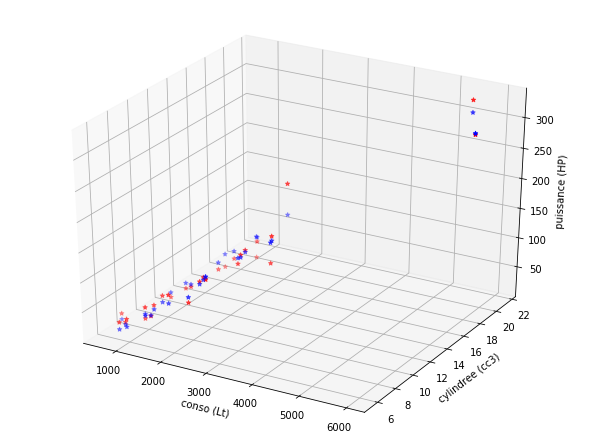

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))   # Ajustes del gráfico
ax = Axes3D(fig)
ax.scatter(x1, x2, y, marker='*', c='r')
ax.scatter(x1, x2, yModel, marker='*', c='b')
ax.set_xlabel('conso (Lt)')        #  eje X
ax.set_ylabel('cylindree (cc3)')   #  eje Y
ax.set_zlabel('puissance (HP)')


Effectivement on peut constater que les donnes reels (rouge)  sont tres proche a les donnes de puissance obtenus avec le modele.

On peut regarder differentment la graphique 3D pour evaluer respect a chaque variable.

Cest impresionant que le modele fait approche meme de donnes "bizarre", mais 

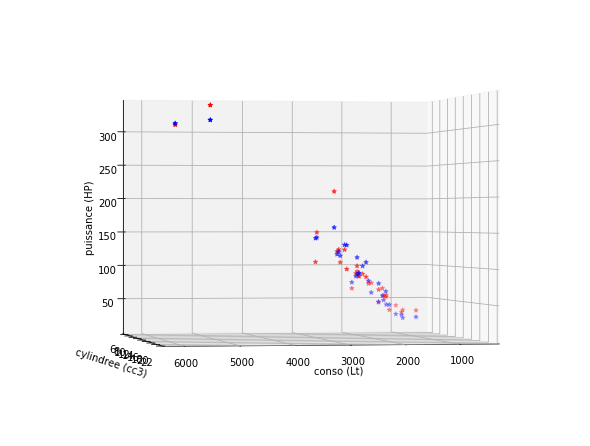

In [43]:
#View
fig = plt.figure(figsize=(8, 6))   # Ajustes del gráfico
ax = Axes3D(fig)
ax.scatter(x1, x2, y, marker='*', c='r')
ax.scatter(x1, x2, yModel, marker='*', c='b')
ax.set_xlabel('conso (Lt)')        #  eje X
ax.set_ylabel('cylindree (cc3)')   #  eje Y
ax.set_zlabel('puissance (HP)')

#View
ax.view_init(elev=0, azim=80)

Graphiquement il semble avoir bonne correlation entre variables Puissance  et Consonmme,comportement verifiable avec le coefficient de correlation (0,96).

In [41]:
matrice_correlation = tit.loc[:, tit.columns != 'Puissance model predicted'].corr().round(2)
print(matrice_correlation)

             Id  prix  cylindree  puissance  poids  conso
Id         1.00  0.20       0.24       0.22   0.42   0.37
prix       0.20  1.00       0.90       0.94   0.63   0.89
cylindree  0.24  0.90       1.00       0.96   0.84   0.94
puissance  0.22  0.94       0.96       1.00   0.78   0.95
poids      0.42  0.63       0.84       0.78   1.00   0.86
conso      0.37  0.89       0.94       0.95   0.86   1.00


# 5.  Regression Multilineaire - Example 2


In [173]:
from sklearn import datasets, linear_model

## Grafic representation initial data

In [174]:
tit.keys()

Index(['Id', 'type', 'prix', 'cylindree', 'puissance', 'poids', 'conso',
       'Puissance model predicted'],
      dtype='object')

In [175]:
# 'conso ~ cylindree + puissance + poids'
x1 = tit['cylindree']
x2 = tit['puissance']
x3 = tit['poids']
y = tit['conso']

## Model

In [176]:
#Model

modelMulti = ols('y ~ x1 + x2 + x3', data=tit).fit()
print(modelMulti.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           4.10e-17
Time:                        00:25:42   Log-Likelihood:                -37.964
No. Observations:                  31   AIC:                             83.93
Df Residuals:                      27   BIC:                             89.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5486      0.675      3.774      0.0

In [144]:
# R-squared = 0.945 cest aussi un tres bon niveau de confiance pour le model.

In [44]:
# Extract Betas
    
modelMulti.params

Intercept   -54.822171
x1            0.034728
x2            7.956969
dtype: float64

In [45]:
# Extraer el  σ2  estimado:
    
modelMulti.mse_resid

280.0253496226268

# y = 2.548 - 0.000164 x1 + 0.038791 x2 + 0.003171 x3

## Prediction

## Comparative numerique model vs reel.

In [46]:
# 'conso ~ cylindree + puissance + poids'
XX = tit[['cylindree', 'puissance', 'poids']]
yModel = modelMulti.predict(XX)

tit['Conso model predicted'] = yModel

tit[['cylindree', 'puissance', 'poids', 'conso', 'Conso model predicted']].head(10)

,cylindree,puissance,poids,conso,Conso model predicted
0,846,32,650,5.7,19.912186
1,993,39,790,5.8,25.812855
2,899,29,730,6.1,24.935542
3,1390,44,955,6.5,45.169631
4,1195,33,895,6.8,40.784820
5,1331,55,1010,7.1,47.894878
6,5987,300,2250,18.7,301.887896
7,2789,209,1485,14.5,157.409436
8,1597,74,1080,7.4,59.519537
9,1761,74,1100,9.0,77.946030


Pas mal, tres proche.

## 5.1. Analysis de error

In [47]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


YYtrue = tit['puissance']
YYpredicted = modelMulti.predict(XX)
 
model_compare = pd.concat([YYtrue, YYpredicted])

dataMulti = [YYtrue, YYpredicted]

headers = ["Real Measured Conso", "Predicted Conso"]

df4 = pd.concat(dataMulti, axis=1, keys=headers)
print(df4)

print("mean squared error: ", np.sqrt(metrics.mean_squared_error(YYtrue, YYpredicted)))
print("mean absoute error: ", metrics.mean_absolute_error(YYtrue, YYpredicted))
print("R2: ", metrics.r2_score(YYtrue, YYpredicted))  #Same Rsquared, near to 1, its a good model.


    Real Measured Conso  Predicted Conso
0                    32        19.912186
1                    39        25.812855
2                    29        24.935542
3                    44        45.169631
4                    33        40.784820
5                    55        47.894878
6                   300       301.887896
7                   209       157.409436
8                    74        59.519537
9                    74        77.946030
10                  101       113.459837
11                   85        89.634064
12                   85        89.668792
13                   89        84.585102
14                   54        61.879265
15                   66        54.926360
16                  106       115.675045
17                   55        40.825628
18                  107       141.485093
19                  150       142.590299
20                  122       117.828163
21                   66        75.036740
22                  125       121.771919
23              

R2 = 0,945 its a good indicator for a good model fit --> Coeficient de determination